## Self Organizing maps (SOM)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/DL ISGI/6_SOM/Credit_Card_Applications.csv')
dataset.shape

(690, 16)

In [5]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [8]:
X.shape

(690, 15)

In [9]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=0c195e38b61908fd66711f8d25b8699625a8224d9235895993551da37bd38f2b
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [10]:
from minisom import MiniSom

In [11]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

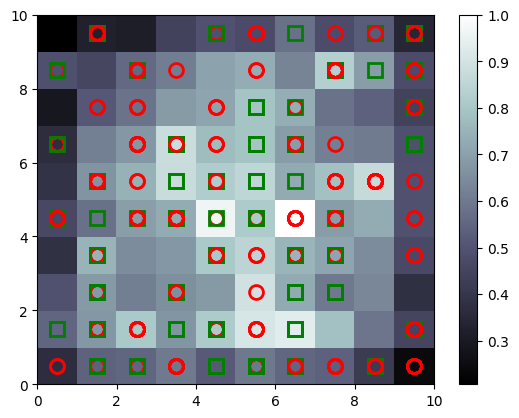

In [12]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone() # initiliser le tableau avec les 100 output nodes
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] # o : cercle, s : carre
colors = ['r', 'g'] # r : red, g : green
# cecle rouge : class 0 (rejeté)
# carre vert : class 1 (accordé)
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [13]:
# finding the frauds
mappings = som.win_map(X)

In [14]:
mappings[(6,4)]

[array([1.77504415e-01, 0.00000000e+00, 1.00300752e-01, 3.75000000e-01,
        0.00000000e+00, 1.00000000e+00, 8.75000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 7.70000000e-02, 3.20000000e-04]),
 array([0.00980263, 0.        , 0.08646617, 0.00589286, 0.5       ,
        0.76923077, 0.375     , 0.00140351, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.19      , 0.        ]),
 array([0.38617061, 0.        , 0.2406015 , 0.02375   , 0.5       ,
        0.61538462, 0.375     , 0.00877193, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.15      , 0.        ]),
 array([0.1515683 , 0.        , 0.13789474, 0.04464286, 0.5       ,
        0.76923077, 0.375     , 0.00877193, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.06      , 0.00809   ]),
 array([3.96453756e-01, 0.00000000e+00, 1.66616541e-01, 1.60714286e-01,
        5.00000000e-01, 6.15384615e-

In [15]:
type(mappings[(6,4)])

list

In [16]:
frauds = np.array(mappings[(6,4)])
frauds = sc.inverse_transform(frauds)

In [17]:
frauds[:,0]

array([15610042., 15568162., 15662152., 15603565., 15664720., 15567919.,
       15687634., 15638751.])

In [18]:
id_fraudeurs = []
for id in frauds[:,0]:
    id = int(id)
    id_fraudeurs.append(id)

In [19]:
id_fraudeurs

[15610042,
 15568162,
 15662152,
 15603565,
 15664720,
 15567919,
 15687634,
 15638751]